In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
fpath = 'C:/Users/USUARIO/Downloads/Formula_1'
circuits = pd.read_csv(f'{fpath}/circuits.csv',  na_values=r'\N')
constructorResults = pd.read_csv(f'{fpath}/constructor_results.csv', na_values=r'\N')
constructors = pd.read_csv(f'{fpath}/constructors.csv', na_values=r'\N')
constructorStandings = pd.read_csv(f'{fpath}/constructor_standings.csv', na_values=r'\N')
drivers = pd.read_csv(f'{fpath}/drivers.csv',  na_values=r'\N')
driverStandings = pd.read_csv(f'{fpath}/driver_standings.csv',  na_values=r'\N')
lapTimes = pd.read_csv(f'{fpath}/lap_times.csv')
pitStops = pd.read_csv(f'{fpath}/pit_stops.csv')
qualifying = pd.read_csv(f'{fpath}/qualifying.csv', na_values=r'\N')
races = pd.read_csv(f'{fpath}/races.csv', na_values=r'\N')
results = pd.read_csv(f'{fpath}/results.csv',  na_values=r'\N')
seasons = pd.read_csv(f'{fpath}/seasons.csv',  na_values=r'\N')
status = pd.read_csv(f'{fpath}/status.csv', na_values=r'\N')

pitStops = pitStops.rename(columns={'time':'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x/1000)


In [5]:
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [6]:
pitStops

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,Unnamed: 7,Unnamed: 8,seconds
0,841,153,1,1,17:05:23,26.898,26898,NaN,NaN,26.898
1,841,30,1,1,17:05:52,25.021,25021,NaN,NaN,25.021
2,841,17,1,11,17:20:48,23.426,23426,NaN,1.759738,23.426
3,841,4,1,12,17:22:34,23.251,23251,NaN,NaN,23.251
4,841,13,1,13,17:24:10,23.842,23842,NaN,NaN,23.842
...,...,...,...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798,NaN,NaN,23.798
10085,1110,830,2,30,16:00:16,23.012,23012,NaN,NaN,23.012
10086,1110,848,3,33,16:07:06,23.529,23529,NaN,NaN,23.529
10087,1110,858,3,34,16:09:09,23.109,23109,NaN,NaN,23.109


In [7]:
pitStops.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'pitTime', 'duration',
       'milliseconds', 'Unnamed: 7', 'Unnamed: 8', 'seconds'],
      dtype='object')

In [8]:
pitStops.rename(columns={'milliseconds': 'miliseconds_pit', 'seconds': 'seconds_pit'}, inplace=True)


In [9]:
pitStops

,raceId,driverId,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,153,1,1,17:05:23,26.898,26898,NaN,NaN,26.898
1,841,30,1,1,17:05:52,25.021,25021,NaN,NaN,25.021
2,841,17,1,11,17:20:48,23.426,23426,NaN,1.759738,23.426
3,841,4,1,12,17:22:34,23.251,23251,NaN,NaN,23.251
4,841,13,1,13,17:24:10,23.842,23842,NaN,NaN,23.842
...,...,...,...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798,NaN,NaN,23.798
10085,1110,830,2,30,16:00:16,23.012,23012,NaN,NaN,23.012
10086,1110,848,3,33,16:07:06,23.529,23529,NaN,NaN,23.529
10087,1110,858,3,34,16:09:09,23.109,23109,NaN,NaN,23.109


In [10]:
pitStops.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,10089.0,962.774011,81.144375,841.000000,888.000,958.00,1035.000,1110.000
driverId,10089.0,523.998910,389.698555,1.000000,18.000,815.00,831.000,858.000
stop,10089.0,1.759738,0.916282,1.000000,1.000,2.00,2.000,6.000
lap,10089.0,25.312023,14.729775,1.000000,13.000,25.00,36.000,78.000
miliseconds_pit,10089.0,75348.633363,278858.845817,12897.000000,21914.000,23570.00,26202.000,3069017.000
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,7.0,738.251391,1229.712655,1.759738,13.500,103.00,869.000,3298.000
seconds_pit,10089.0,75.348633,278.858846,12.897000,21.914,23.57,26.202,3069.017


In [11]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3.0,19,16.0,16,16,0.0,44,+1:43.071,5053521.0,25.0,15.0,1:50.994,227.169,1
26076,26082,1110,858,3,2.0,18,17.0,17,17,0.0,44,+1:44.476,5054926.0,37.0,9.0,1:50.486,228.213,1
26077,26083,1110,807,210,27.0,0,18.0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1
26078,26084,1110,832,6,55.0,4,NaN,R,19,0.0,23,NaN,NaN,9.0,19.0,1:53.138,222.864,130


In [12]:
df = pd.merge(results,races[['raceId','year','name','round']],on = 'raceId',how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId',how ='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on ='constructorId',how ='left')

In [13]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3.0,19,16.0,16,16,0.0,...,1:50.994,227.169,1,2023,Belgian Grand Prix,12,ricciardo,Australian,AlphaTauri,Italian
26076,26082,1110,858,3,2.0,18,17.0,17,17,0.0,...,1:50.486,228.213,1,2023,Belgian Grand Prix,12,sargeant,American,Williams,British
26077,26083,1110,807,210,27.0,0,18.0,18,18,0.0,...,1:49.907,229.415,1,2023,Belgian Grand Prix,12,hulkenberg,German,Haas F1 Team,American
26078,26084,1110,832,6,55.0,4,NaN,R,19,0.0,...,1:53.138,222.864,130,2023,Belgian Grand Prix,12,sainz,Spanish,Ferrari,Italian


In [14]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [15]:
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId'],axis =1,inplace = True)

In [16]:
df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,18,1,1,1,1,10.0,1:34:50.616,5690616.0,2.0,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,18,2,2,5,2,8.0,+5.478,5696094.0,3.0,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,18,3,3,7,3,6.0,+8.163,5698779.0,5.0,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,18,4,4,11,4,5.0,+17.181,5707797.0,7.0,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,18,5,1,3,5,4.0,+18.014,5708630.0,1.0,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,817,213,19,16,0.0,+1:43.071,5053521.0,15.0,1:50.994,227.169,2023,Belgian Grand Prix,12,ricciardo,Australian,AlphaTauri,Italian
26076,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,228.213,2023,Belgian Grand Prix,12,sargeant,American,Williams,British
26077,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,229.415,2023,Belgian Grand Prix,12,hulkenberg,German,Haas F1 Team,American
26078,1110,832,6,4,19,0.0,NaN,NaN,19.0,1:53.138,222.864,2023,Belgian Grand Prix,12,sainz,Spanish,Ferrari,Italian


In [17]:
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)

In [18]:
df.columns


Index(['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder',
       'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'driver',
       'driver_nationality', 'constructor_name', 'constructor_nationality'],
      dtype='object')

In [19]:
pitStops    

,raceId,driverId,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,153,1,1,17:05:23,26.898,26898,NaN,NaN,26.898
1,841,30,1,1,17:05:52,25.021,25021,NaN,NaN,25.021
2,841,17,1,11,17:20:48,23.426,23426,NaN,1.759738,23.426
3,841,4,1,12,17:22:34,23.251,23251,NaN,NaN,23.251
4,841,13,1,13,17:24:10,23.842,23842,NaN,NaN,23.842
...,...,...,...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798,NaN,NaN,23.798
10085,1110,830,2,30,16:00:16,23.012,23012,NaN,NaN,23.012
10086,1110,848,3,33,16:07:06,23.529,23529,NaN,NaN,23.529
10087,1110,858,3,34,16:09:09,23.109,23109,NaN,NaN,23.109


In [20]:
pitStops.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'pitTime', 'duration',
       'miliseconds_pit', 'Unnamed: 7', 'Unnamed: 8', 'seconds_pit'],
      dtype='object')

In [21]:
merged_df = df.merge(pitStops, on=['raceId', 'driverId'])


In [22]:
merged_df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_name,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603
1,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,2,36,17:59:17,24.036,24036,NaN,NaN,24.036
2,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,1,16,17:28:24,23.227,23227,NaN,NaN,23.227
3,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,2,36,17:59:29,23.199,23199,NaN,NaN,23.199
4,841,808,4,6,3,15.0,+30.560,5400819.0,7.0,1:30.064,...,Renault,French,1,16,17:28:39,24.535,24535,NaN,1364.0,24.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,2,24,15:50:09,23.938,23938,NaN,NaN,23.938
10085,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,3,34,16:09:09,23.109,23109,NaN,NaN,23.109
10086,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,1,12,15:26:56,24.571,24571,NaN,NaN,24.571
10087,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,2,24,15:50:04,25.238,25238,NaN,NaN,25.238


In [23]:
merged_df.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder',
       'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'driver',
       'driver_nationality', 'constructor_name', 'constructor_nationality',
       'stop', 'lap', 'pitTime', 'duration', 'miliseconds_pit', 'Unnamed: 7',
       'Unnamed: 8', 'seconds_pit'],
      dtype='object')

In [24]:
merged_df = merged_df[(merged_df['year'] != 2019) & (merged_df['year'] > 2010)]

In [25]:
merged_df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_name,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603
1,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,2,36,17:59:17,24.036,24036,NaN,NaN,24.036
2,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,1,16,17:28:24,23.227,23227,NaN,NaN,23.227
3,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,2,36,17:59:29,23.199,23199,NaN,NaN,23.199
4,841,808,4,6,3,15.0,+30.560,5400819.0,7.0,1:30.064,...,Renault,French,1,16,17:28:39,24.535,24535,NaN,1364.0,24.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,2,24,15:50:09,23.938,23938,NaN,NaN,23.938
10085,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,3,34,16:09:09,23.109,23109,NaN,NaN,23.109
10086,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,1,12,15:26:56,24.571,24571,NaN,NaN,24.571
10087,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,2,24,15:50:04,25.238,25238,NaN,NaN,25.238


In [26]:

#contar el número de paradas por conductor cada carrera
stop_counts = merged_df.groupby(['raceId', 'driverId'])['stop'].count().reset_index(name='Stop_at_race')


stop_counts

,raceId,driverId,Stop_at_race
0,841,1,2
1,841,2,2
2,841,3,1
3,841,4,3
4,841,5,1
...,...,...,...
4517,1110,847,1
4518,1110,848,3
4519,1110,852,2
4520,1110,855,2


In [27]:
df_bueno=df[(df['year'] != 2019) & (df['year'] > 2010)]

In [28]:
df_prom = stop_counts.merge(df_bueno, on=['raceId', 'driverId'])

In [29]:
df_prom

,raceId,driverId,Stop_at_race,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,841,1,2,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,211.382,2011,Australian Grand Prix,1,hamilton,British,McLaren,British
1,841,2,2,4,18,12,0.0,NaN,NaN,15.0,1:32.377,206.661,2011,Australian Grand Prix,1,heidfeld,German,Renault,French
2,841,3,1,131,7,17,0.0,NaN,NaN,17.0,1:33.503,204.173,2011,Australian Grand Prix,1,rosberg,German,Mercedes,German
3,841,4,3,6,5,4,12.0,+31.772,5402031.0,2.0,1:29.487,213.336,2011,Australian Grand Prix,1,alonso,Spanish,Ferrari,Italian
4,841,5,1,205,19,18,0.0,NaN,NaN,20.0,1:34.918,201.129,2011,Australian Grand Prix,1,kovalainen,Finnish,Lotus,Malaysian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,1110,847,1,131,8,6,8.0,+1:03.101,5013551.0,11.0,1:50.603,227.972,2023,Belgian Grand Prix,12,russell,British,Mercedes,German
4518,1110,848,3,3,15,14,0.0,+1:36.184,5046634.0,3.0,1:49.841,229.553,2023,Belgian Grand Prix,12,albon,Thai,Williams,British
4519,1110,852,2,213,11,10,1.0,+1:20.221,5030671.0,17.0,1:51.394,226.353,2023,Belgian Grand Prix,12,tsunoda,Japanese,AlphaTauri,Italian
4520,1110,855,2,51,17,13,0.0,+1:35.441,5045891.0,5.0,1:50.188,228.830,2023,Belgian Grand Prix,12,zhou,Chinese,Alfa Romeo,Swiss


In [30]:
df_prom.columns


Index(['raceId', 'driverId', 'Stop_at_race', 'constructorId', 'grid',
       'positionOrder', 'points', 'time', 'milliseconds', 'fastest_lap_rank',
       'fastestLapTime', 'fastestLapSpeed', 'year', 'gp_name', 'round',
       'driver', 'driver_nationality', 'constructor_name',
       'constructor_nationality'],
      dtype='object')

In [31]:
df_prom_sorted=df_prom.sort_values('positionOrder', ascending=True)

In [32]:
df_prom_sorted


,raceId,driverId,Stop_at_race,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
1315,902,1,2,131,2,1,25.0,1:39:42.743,5982743.0,2.0,1:37.108,200.634,2014,Bahrain Grand Prix,3,hamilton,British,Mercedes,German
1337,903,1,2,131,1,1,25.0,1:33:28.338,5608338.0,2.0,1:41.196,193.916,2014,Chinese Grand Prix,4,hamilton,British,Mercedes,German
1358,904,1,2,131,1,1,25.0,1:41:05.155,6065155.0,3.0,1:29.483,187.275,2014,Spanish Grand Prix,5,hamilton,British,Mercedes,German
3450,1046,815,2,211,5,1,25.0,1:31:15.114,5475114.0,3.0,0:56.789,224.599,2020,Sakhir Grand Prix,16,perez,Mexican,Racing Point,British
1381,905,3,1,131,1,1,25.0,1:49:27.661,6567661.0,4.0,1:19.425,151.388,2014,Monaco Grand Prix,6,rosberg,German,Mercedes,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,856,30,1,131,12,24,0.0,NaN,NaN,22.0,1:45.327,191.916,2011,Korean Grand Prix,16,michael_schumacher,German,Mercedes,German
409,859,10,1,166,24,24,0.0,NaN,NaN,24.0,1:21.773,189.700,2011,Brazilian Grand Prix,19,glock,German,Virgin,British
175,848,39,3,164,24,24,0.0,NaN,NaN,24.0,1:47.708,181.123,2011,European Grand Prix,8,karthikeyan,Indian,HRT,Spanish
809,876,815,2,15,8,24,0.0,NaN,NaN,23.0,1:32.208,200.091,2012,Indian Grand Prix,17,perez,Mexican,Sauber,Swiss


In [33]:

average_stops_by_position = df_prom_sorted.groupby('positionOrder')['Stop_at_race'].mean().reset_index()

average_stops_by_position.columns = ['Finishing Position', 'Average Number of Stops']

print(average_stops_by_position)


    Finishing Position  Average Number of Stops
0                    1                 1.978261
1                    2                 2.000000
2                    3                 2.039130
3                    4                 2.095652
4                    5                 2.043478
5                    6                 2.021739
6                    7                 2.013043
7                    8                 1.978261
8                    9                 2.069565
9                   10                 2.061135
10                  11                 2.069565
11                  12                 2.152174
12                  13                 2.217391
13                  14                 2.257642
14                  15                 2.276316
15                  16                 2.215247
16                  17                 2.174312
17                  18                 2.164948
18                  19                 2.130435
19                  20                 1

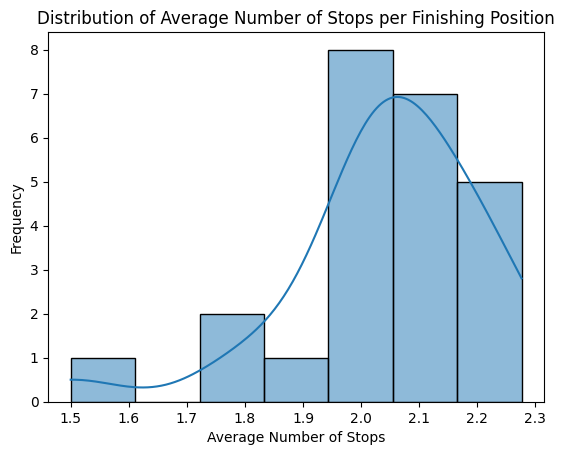

In [34]:
sns.histplot(average_stops_by_position['Average Number of Stops'], kde=True)
plt.title('Distribution of Average Number of Stops per Finishing Position')
plt.xlabel('Average Number of Stops')
plt.ylabel('Frequency')
plt.show()

In [35]:
import scipy

In [36]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


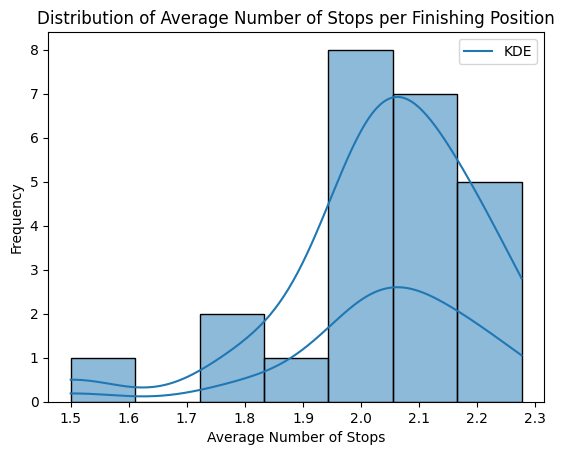

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

data = average_stops_by_position['Average Number of Stops']

# Calculamos la KDE
kde = gaussian_kde(data)

# Creamos un rango de valores para evaluar la KDE
x = np.linspace(data.min(), data.max(), 1000)

# Evaluamos la KDE en este rango
kde_values = kde(x)

# Graficamos el histograma con KDE
sns.histplot(data, kde=True)
plt.title('Distribution of Average Number of Stops per Finishing Position')
plt.xlabel('Average Number of Stops')
plt.ylabel('Frequency')

# También podemos graficar la KDE calculada para comparar
plt.plot(x, kde_values, label='KDE')

plt.legend()
plt.show()


In [39]:
from scipy import stats

stat, p = stats.shapiro(average_stops_by_position['Average Number of Stops'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation of the result
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (normal)')
else:
    print('Sample does not look Gaussian (normal)')


Statistics=0.887, p=0.012
Sample does not look Gaussian (normal)


In [40]:
type(average_stops_by_position)


pandas.core.frame.DataFrame

In [41]:
#average_stops_by_position.to_csv('C:/Users/USUARIO/Downloads/Formula_1/average_stops_by_position_2.csv')


In [42]:
average_stops_by_position.set_index('Finishing Position', inplace=True)


In [43]:
average_stops_by_position

,Average Number of Stops
Finishing Position,
1,1.978261
2,2.000000
3,2.039130
4,2.095652
5,2.043478
6,2.021739
7,2.013043
8,1.978261
9,2.069565


In [44]:
#average_stops_by_position.to_csv('average_stops_by_position.csv', index=True)
